## <center>Pascal Poupart Assignment 1</center> 

#### Dataset
- Origin: this data is a modified version of the Optical Recognition of Handwritten Digits Dataset from the UCI repository. It contains pre-processed black and white images of the digits 5 and 6. Each feature indicates how many pixels are black in a patch of 4 x 4 pixels.
- Format: there is one row per image and one column per feature. The class labels are 5 and 6. The label on line n in train_labels.csv is the label for the data point on line n in train_inputs.csv.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

### Data

In [2]:
def load_knn_data():
  test_inputs = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/KNN/Exercises/knn-dataset/test_inputs.csv")
  test_labels = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/KNN/Exercises/knn-dataset/test_labels.csv")
  train_inputs = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/KNN/Exercises/knn-dataset/train_inputs.csv")
  train_labels = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/KNN/Exercises/knn-dataset/train_labels.csv")
  return train_inputs, train_labels, test_inputs, test_labels


# load data
X_train, y_train, X_test, y_test = load_knn_data()

### Model training

In [3]:
knn = KNeighborsClassifier()

k_values = np.arange(1, 31, 1)
param_grid = {'n_neighbors': k_values}
m = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

m.fit(X_train,y_train)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [4]:
m.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 2,
 'weights': 'uniform'}

In [5]:
mean_scores = m.cv_results_["mean_test_score"]
print(f"Best accuracy {max(mean_scores), {k_values[np.argmax(mean_scores)]}}")

Best accuracy (0.7937777777777778, {14})


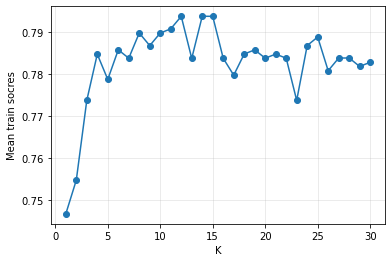

In [6]:
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Mean train socres")
plt.grid(alpha=0.3)

### Model evaluation

In [7]:
y_pred = m.predict(X_test)
confusion_matrix(y_test, y_pred)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.000000000000000000e+00.5
- 1.000000000000000000e+00.6
- 1.000000000000000000e+00.7
- 1.300000000000000000e+01
- 1.300000000000000000e+01.1
- ...
Feature names seen at fit time, yet now missing:
- 0.000000000000000000e+00.14
- 0.000000000000000000e+00.15
- 0.000000000000000000e+00.16
- 0.000000000000000000e+00.17
- 0.000000000000000000e+00.18
- ...

  warnings.warn(message, FutureWarning)


array([[37, 14],
       [10, 48]], dtype=int64)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         5.0       0.79      0.73      0.76        51
         6.0       0.77      0.83      0.80        58

    accuracy                           0.78       109
   macro avg       0.78      0.78      0.78       109
weighted avg       0.78      0.78      0.78       109

